In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline

In [2]:
data = np.load('./data/X_pca__y.pickle.npz')
data.files

['arr_0', 'arr_1']

In [3]:
X = data['arr_0']
y = data['arr_1']

In [4]:
X

array([[-0.91506979,  0.48180852,  0.20704791, ...,  0.56922418,
        -0.39028378,  0.4719658 ],
       [ 0.13294896, -1.45543858,  1.04608453, ..., -0.71917477,
         0.26506099,  0.3416993 ],
       [-0.14472278,  0.71860795,  0.57591761, ..., -0.59442688,
        -1.10766488, -1.28970671],
       ...,
       [-0.27702839, -2.09651936,  0.54259194, ..., -2.01721177,
        -0.55892775, -1.55317043],
       [ 0.5214419 ,  0.24517402,  0.80731858, ..., -0.70005152,
        -0.56115071, -0.79240801],
       [-1.1050424 , -1.59202117, -2.46535338, ..., -2.58843643,
        -0.08552871, -2.31841253]])

In [5]:
y

array([1, 1, 1, ..., 0, 0, 0])

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((5377, 50), (1345, 50), (5377,), (1345,))

# Training a Machine Learning Model

In [7]:
from sklearn.neighbors import KNeighborsClassifier   
model = KNeighborsClassifier(n_neighbors = 1) 

In [8]:
model.fit(x_train,y_train)
print('model trained sucessfully')

model trained sucessfully


In [9]:
# score
model.score(x_train,y_train)

0.9986981588246234

In [10]:
# score
model.score(x_test,y_test)

0.7591078066914498

# Model Evaluation
- Confusion Matrix
- Classification Report 
- Kappa Score
- ROC and AUC (probability)

In [11]:
from sklearn import metrics

In [12]:
y_pred = model.predict(x_test)
y_prob = model.predict_proba(x_test) # proability

In [13]:
cm = metrics.confusion_matrix(y_test,y_pred)

<AxesSubplot:>

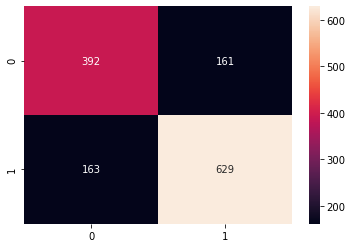

In [14]:
import seaborn as sns
sns.heatmap(cm,annot=True,fmt ='d')

In [15]:
# classification report
cr = metrics.classification_report(y_test,y_pred,target_names=['male','female'],output_dict=True)
pd.DataFrame(cr).T

,precision,recall,f1-score,support
male,0.706306,0.708861,0.707581,553.000000
female,0.796203,0.794192,0.795196,792.000000
accuracy,0.759108,0.759108,0.759108,0.759108
macro avg,0.751254,0.751526,0.751389,1345.000000
weighted avg,0.759241,0.759108,0.759173,1345.000000


In [16]:
# kappa
metrics.cohen_kappa_score(y_test,y_pred)

0.502778316579761

# ROC and AUC

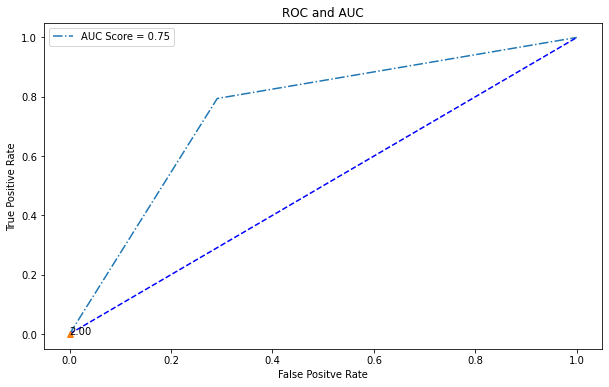

In [17]:
# roc for female
fpr,tpr,thresh = metrics.roc_curve(y_test,y_prob[:,1])
auc_s = metrics.auc(fpr,tpr)
plt.figure(figsize=(10,6))
plt.plot(fpr,tpr,'-.')
plt.plot([0,1],[0,1],'b--')
for i in range(0,len(thresh),20):
    plt.plot(fpr[i],tpr[i],'^')
    plt.text(fpr[i],tpr[i],"%0.2f"%thresh[i])
    
plt.legend(['AUC Score = %0.2f'%auc_s])

plt.xlabel('False Positve Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC and AUC')
plt.show()